In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random as r
from datetime import datetime
from scipy import stats

In [2]:
data_2016 = pd.read_csv("dataset/presidential_polls.csv")

In [3]:
data_2016 = data_2016[["startdate", "enddate", "state", "pollster", "grade", "samplesize", "population", "adjpoll_clinton", "adjpoll_trump"]]
trump_clinton = data_2016.rename(columns = {"startdate": "start_date", "enddate": "end_date", "grade":"fte_grade", "samplesize":"sample_size", "adjpoll_clinton":"Clinton", "adjpoll_trump":"Trump"})
trump_clinton["start_date"] = pd.to_datetime(trump_clinton["start_date"])
trump_clinton["end_date"] = pd.to_datetime(trump_clinton["end_date"])
trump_clinton = trump_clinton.sort_values(by = ["end_date", "start_date"]) # arranging the polls from most to least recent
trump_clinton["dem_lead"] = trump_clinton["Clinton"] - trump_clinton["Trump"] #lead of the democratic candidate (negative if they are losing)

In [4]:
trump_clinton.head()

,start_date,end_date,state,pollster,fte_grade,sample_size,population,Clinton,Trump,dem_lead
3077,2015-11-07,2015-11-08,South Carolina,Public Policy Polling,B+,1290.0,v,40.63694,45.19826,-4.56132
6520,2015-11-07,2015-11-08,South Carolina,Public Policy Polling,B+,1290.0,v,40.48820,45.19637,-4.70817
9901,2015-11-07,2015-11-08,South Carolina,Public Policy Polling,B+,1290.0,v,40.69941,45.18212,-4.48271
3206,2015-11-09,2015-11-13,Virginia,Roanoke College,C+,555.0,rv,49.81532,36.21050,13.60482
6638,2015-11-09,2015-11-13,Virginia,Roanoke College,C+,555.0,rv,49.00173,37.02524,11.97649


In [5]:
trump_clinton.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10236 entries, 3077 to 6833
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   start_date   10236 non-null  datetime64[ns]
 1   end_date     10236 non-null  datetime64[ns]
 2   state        10236 non-null  object        
 3   pollster     10236 non-null  object        
 4   fte_grade    9102 non-null   object        
 5   sample_size  10233 non-null  float64       
 6   population   10236 non-null  object        
 7   Clinton      10236 non-null  float64       
 8   Trump        10236 non-null  float64       
 9   dem_lead     10236 non-null  float64       
dtypes: datetime64[ns](2), float64(4), object(4)
memory usage: 879.7+ KB


In [6]:
data_2020 = pd.read_csv("dataset/president_polls.csv")
data_2020 = data_2020[["poll_id","start_date", "end_date", "state", "pollster", "fte_grade", "sample_size", "population", "answer", "pct"]]

In [7]:
data_2020.head()

,poll_id,start_date,end_date,state,pollster,fte_grade,sample_size,population,answer,pct
0,63277,1/9/20,1/12/20,Michigan,EPIC-MRA,B+,600,lv,Biden,50.0
1,63277,1/9/20,1/12/20,Michigan,EPIC-MRA,B+,600,lv,Trump,44.0
2,63277,1/9/20,1/12/20,Michigan,EPIC-MRA,B+,600,lv,Sanders,50.0
3,63277,1/9/20,1/12/20,Michigan,EPIC-MRA,B+,600,lv,Trump,45.0
4,63277,1/9/20,1/12/20,Michigan,EPIC-MRA,B+,600,lv,Warren,48.0


In [8]:
data_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2735 entries, 0 to 2734
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   poll_id      2735 non-null   int64  
 1   start_date   2735 non-null   object 
 2   end_date     2735 non-null   object 
 3   state        1435 non-null   object 
 4   pollster     2735 non-null   object 
 5   fte_grade    2583 non-null   object 
 6   sample_size  2735 non-null   int64  
 7   population   2735 non-null   object 
 8   answer       2735 non-null   object 
 9   pct          2735 non-null   float64
dtypes: float64(1), int64(2), object(7)
memory usage: 213.8+ KB


In [9]:
data_2020["state"] = data_2020.state.fillna("U.S.")

In [10]:
def trump_opponent(data_2020, opp):
    trump_vs = data_2020[(data_2020["answer"] == opp) | (data_2020["answer"] == "Trump")]
    trump_vs = trump_vs.pivot_table(values = "pct", index = ["poll_id", "start_date", "end_date", "state", "pollster", "fte_grade", "sample_size", "population"], columns = "answer")
    trump_vs = trump_vs.dropna(axis = 0, how = "any") #Drops the Trump polls against any opponent that isn't our opp parameter
    trump_vs = trump_vs.reset_index().drop(columns = ["poll_id"])
    trump_vs["start_date"] = pd.to_datetime(trump_vs["start_date"])
    trump_vs["end_date"] = pd.to_datetime(trump_vs["end_date"]) 
    trump_vs["dem_lead"] = trump_vs[opp] - trump_vs["Trump"] 
    trump_vs = trump_vs.sort_values(by = ["end_date", "start_date"]) #Arranging the polls from most to least recent
    return trump_vs

In [11]:
trump_biden = trump_opponent(data_2020, "Biden")
trump_biden.head()

answer,start_date,end_date,state,pollster,fte_grade,sample_size,population,Biden,Trump,dem_lead
0,2018-11-27,2018-11-28,Ohio,Public Policy Polling,B,648,v,48.0,45.250000,2.750000
1,2018-12-16,2018-12-17,U.S.,Harris Insights & Analytics,C+,1001,rv,42.0,36.666667,5.333333
2,2019-01-04,2019-01-07,North Carolina,Public Policy Polling,B,750,rv,49.0,45.333333,3.666667
3,2019-01-19,2019-01-21,U.S.,Public Policy Polling,B,760,rv,53.0,41.666667,11.333333
4,2019-01-24,2019-01-26,Michigan,Glengariff Group Inc.,B/C,600,lv,53.3,41.600000,11.700000


In [12]:
trump_sanders = trump_opponent(data_2020, "Sanders")
trump_sanders.head()

answer,start_date,end_date,state,pollster,fte_grade,sample_size,population,Sanders,Trump,dem_lead
0,2018-11-27,2018-11-28,Ohio,Public Policy Polling,B,648,v,47.0,45.250000,1.750000
1,2018-12-16,2018-12-17,U.S.,Harris Insights & Analytics,C+,1001,rv,38.0,36.666667,1.333333
2,2019-01-04,2019-01-07,North Carolina,Public Policy Polling,B,750,rv,48.0,45.333333,2.666667
4,2019-01-16,2019-01-21,New Hampshire,Praecones Analytica,B/C,593,rv,54.1,41.033333,13.066667
3,2019-01-19,2019-01-21,U.S.,Public Policy Polling,B,760,rv,51.0,41.666667,9.333333


In [13]:
trump_warren = trump_opponent(data_2020, "Warren")
trump_warren.head()

answer,start_date,end_date,state,pollster,fte_grade,sample_size,population,Trump,Warren,dem_lead
0,2018-11-27,2018-11-28,Ohio,Public Policy Polling,B,648,v,45.250000,43.0,-2.250000
1,2019-01-04,2019-01-07,North Carolina,Public Policy Polling,B,750,rv,45.333333,46.0,0.666667
3,2019-01-16,2019-01-21,New Hampshire,Praecones Analytica,B/C,593,rv,41.033333,53.5,12.466667
2,2019-01-19,2019-01-21,U.S.,Public Policy Polling,B,760,rv,41.666667,48.0,6.333333
4,2019-01-24,2019-01-26,Michigan,Glengariff Group Inc.,B/C,600,lv,41.600000,45.8,4.200000


In [14]:
trump_buttigieg = trump_opponent(data_2020, "Buttigieg")
trump_buttigieg.head()

answer,start_date,end_date,state,pollster,fte_grade,sample_size,population,Buttigieg,Trump,dem_lead
0,2019-03-19,2019-03-20,U.S.,Harris Insights & Analytics,C+,1001,rv,27.0,35.75,-8.75
2,2019-03-27,2019-03-28,U.S.,Public Policy Polling,B,846,rv,45.0,41.00,4.00
1,2019-03-28,2019-03-30,Nevada,Emerson College,A-,719,rv,48.0,51.22,-3.22
3,2019-04-03,2019-04-04,U.S.,Harris Insights & Analytics,C+,1002,rv,28.0,37.00,-9.00
4,2019-04-11,2019-04-14,U.S.,Emerson College,A-,914,rv,48.6,49.55,-0.95


In [15]:
results_2016 = pd.read_csv("dataset/p1.csv")
results_2016 = results_2016.groupby("State").sum()[["Clinton", "Trump"]]
results_2016.loc["U.S."] = [65853514, 62984828] #Adding a row for the national result
results_2016["Clinton_pct"] = 100 * results_2016["Clinton"] / (results_2016["Clinton"] + results_2016["Trump"])
results_2016["Trump_pct"] = 100 * results_2016["Trump"] / (results_2016["Clinton"] + results_2016["Trump"]) #percentages
results_2016["dem_lead"] = results_2016["Clinton_pct"] - results_2016["Trump_pct"]
results_2016["index"] = list(range(0,50))
results_2016["state"] = results_2016.index
results_2016 = results_2016.set_index("index")

In [16]:
results_2016.head()

,Clinton,Trump,Clinton_pct,Trump_pct,dem_lead,state
index,,,,,,
0,718084.0,1306925.0,35.460781,64.539219,-29.078439,Alabama
1,888374.0,972900.0,47.729351,52.270649,-4.541298,Arizona
2,378729.0,677904.0,35.843003,64.156997,-28.313994,Arkansas
3,5488776.0,2970470.0,64.884932,35.115068,29.769864,California
4,1208095.0,1136354.0,51.530018,48.469982,3.060037,Colorado


In [17]:
results_2016.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Clinton      50 non-null     float64
 1   Trump        50 non-null     float64
 2   Clinton_pct  50 non-null     float64
 3   Trump_pct    50 non-null     float64
 4   dem_lead     50 non-null     float64
 5   state        50 non-null     object 
dtypes: float64(5), object(1)
memory usage: 2.7+ KB


In [18]:
def trump_vs_clinton(trump_clinton, state, results_2016, reliable = False, likely_voters = False):
    
    #getting polls for the specified state / U.S. and filtering if necessary
    match_up = trump_clinton
    match_up = match_up[match_up["state"] == state]
    
    if reliable == True:
        match_up = match_up[match_up["fte_grade"].isin(["A+", "A", "A-"])]
    if likely_voters == True:
        match_up = match_up[match_up["population"] == "lv"]
    
    #Accounting for repeated polls which have the same end date
    
    match_up = match_up.groupby(["end_date", "pollster", "fte_grade", "population"]).mean().reset_index()
    match_up.index = match_up["end_date"]
    
    #A rolling average of democrat lead/deficit in the past 14 days
    
    if state == "U.S.":
        match_up["average_lead"] = match_up["dem_lead"].rolling("14D", min_periods = 0).mean()
    else:
        match_up["average_lead"] = match_up["dem_lead"].rolling("30D", min_periods = 0).mean()
    
    #Plotting the time series
    
    polls_vs_final =  [match_up.iloc[-1]["average_lead"], results_2016[results_2016["state"] == state].iloc[0]["dem_lead"]]
    polls_df = pd.DataFrame(polls_vs_final)
    polls_df[1] = ["Final/Current Polling Average", "Actual Results"]
    
    plt.subplots(figsize = (9,6))
    plt.subplot(1,2,1)
    plt.plot(match_up["end_date"], match_up["average_lead"])
    plt.xlabel("Date")
    plt.xticks(rotation = 90)
    plt.ylabel("Lead or Deficit vs. Trump (%)")
    plt.title(f"Trump vs. Clinton in {state}")  
    plt.subplot(1,2,2)
    plt.bar(polls_df[1], polls_df[0])
    plt.xticks(rotation = 90)
    plt.title("Poll Accuracy Chart")
    plt.show()
    
    if reliable == True:
        return f"Percentage Points of Trump Underestimation in {state} From Historically Reliable Polls: {round(polls_vs_final[0] - polls_vs_final[1], 2)}%"
    if likely_voters == True:
        return f"Percentage Points of Trump Underestimation in {state} From Polls of Likely Voters: {round(polls_vs_final[0] - polls_vs_final[1], 2)}%"
    return f"Percentage Points of Trump Underestimation in {state} From All Polls: {round(polls_vs_final[0] - polls_vs_final[1], 2)}%"

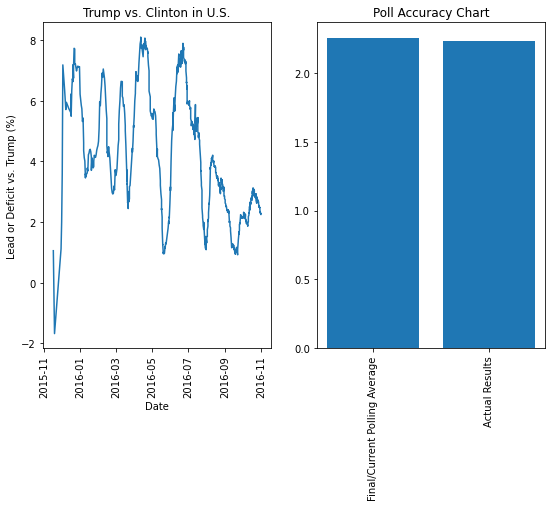

'Percentage Points of Trump Underestimation in U.S. From All Polls: 0.03%'

In [19]:
trump_vs_clinton(trump_clinton, "U.S.", results_2016)

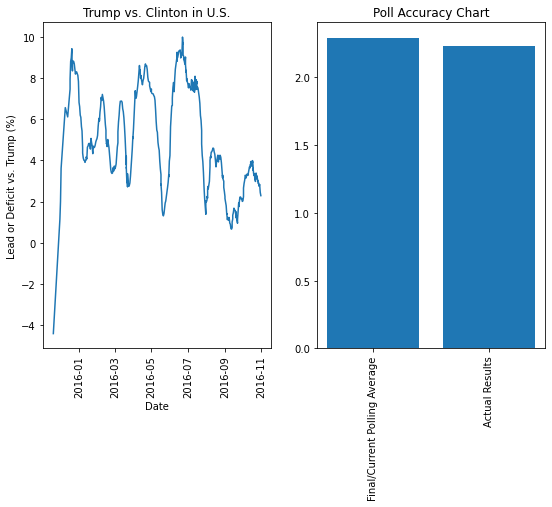

'Percentage Points of Trump Underestimation in U.S. From Historically Reliable Polls: 0.06%'

In [20]:
trump_vs_clinton(trump_clinton, "U.S.", results_2016, reliable = True)

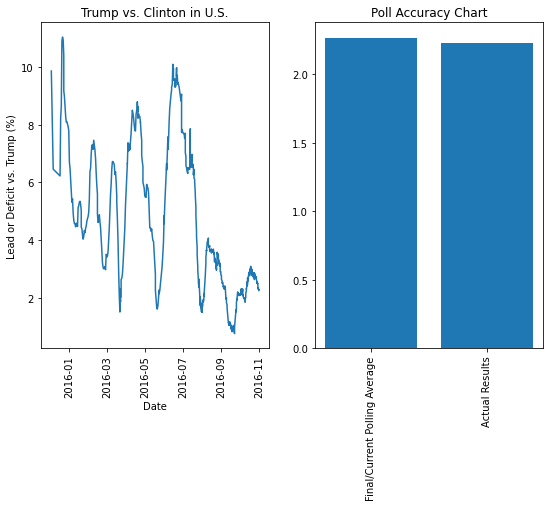

'Percentage Points of Trump Underestimation in U.S. From Polls of Likely Voters: 0.04%'

In [21]:
trump_vs_clinton(trump_clinton, "U.S.", results_2016, likely_voters = True)

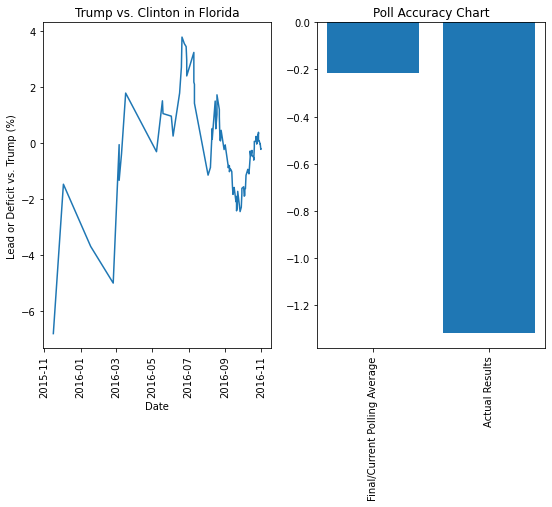

'Percentage Points of Trump Underestimation in Florida From All Polls: 1.1%'

In [22]:
trump_vs_clinton(trump_clinton, "Florida", results_2016)

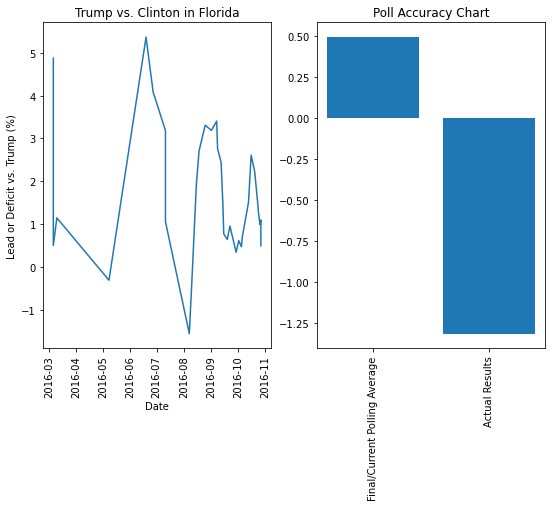

'Percentage Points of Trump Underestimation in Florida From Historically Reliable Polls: 1.81%'

In [23]:
trump_vs_clinton(trump_clinton, "Florida", results_2016, reliable = True)

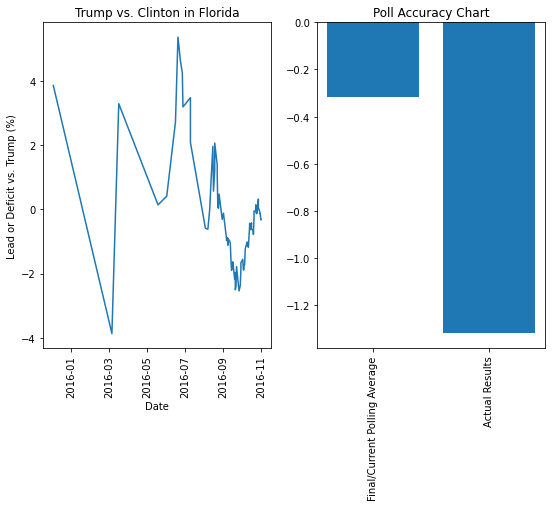

'Percentage Points of Trump Underestimation in Florida From Polls of Likely Voters: 1.0%'

In [24]:
trump_vs_clinton(trump_clinton, "Florida", results_2016, likely_voters = True)

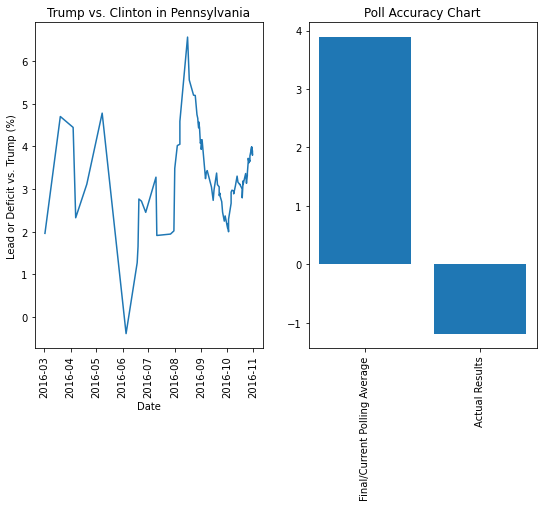

'Percentage Points of Trump Underestimation in Pennsylvania From All Polls: 5.07%'

In [25]:
trump_vs_clinton(trump_clinton, "Pennsylvania", results_2016)

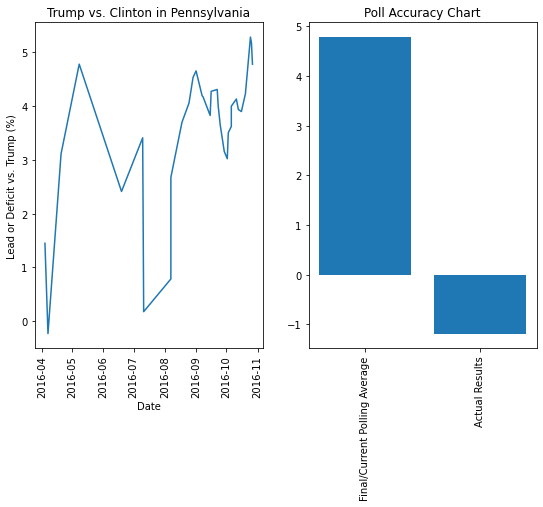

'Percentage Points of Trump Underestimation in Pennsylvania From Historically Reliable Polls: 5.97%'

In [26]:
trump_vs_clinton(trump_clinton, "Pennsylvania", results_2016, reliable = True)

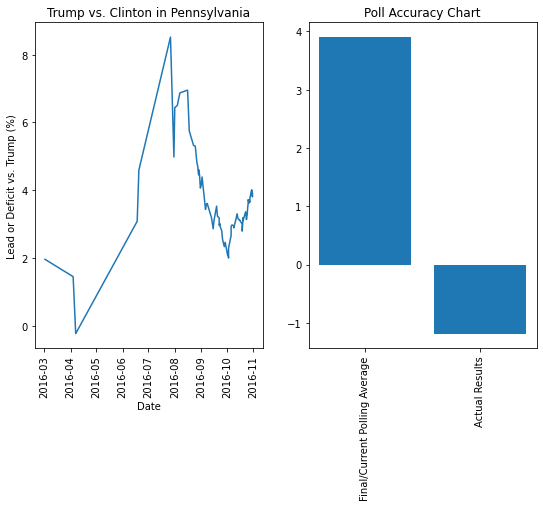

'Percentage Points of Trump Underestimation in Pennsylvania From Polls of Likely Voters: 5.09%'

In [27]:
trump_vs_clinton(trump_clinton, "Pennsylvania", results_2016, likely_voters = True)

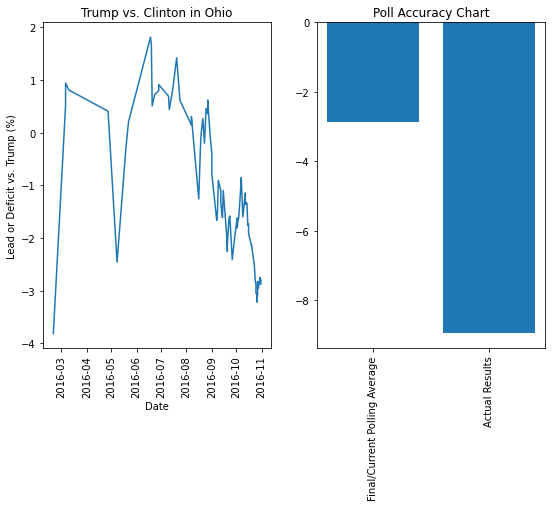

'Percentage Points of Trump Underestimation in Ohio From All Polls: 6.07%'

In [28]:
trump_vs_clinton(trump_clinton, "Ohio", results_2016)

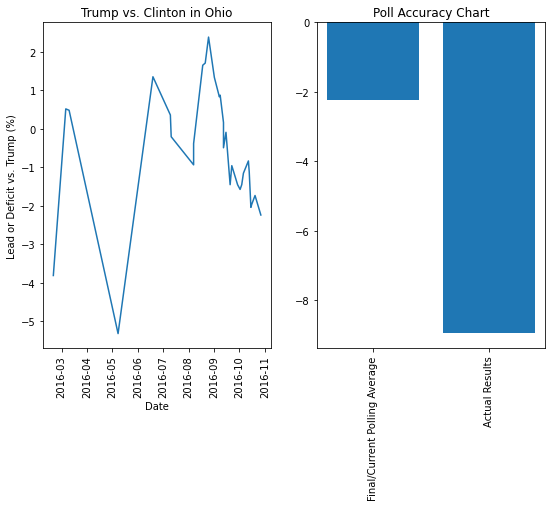

'Percentage Points of Trump Underestimation in Ohio From Historically Reliable Polls: 6.7%'

In [29]:
trump_vs_clinton(trump_clinton, "Ohio", results_2016, reliable = True)

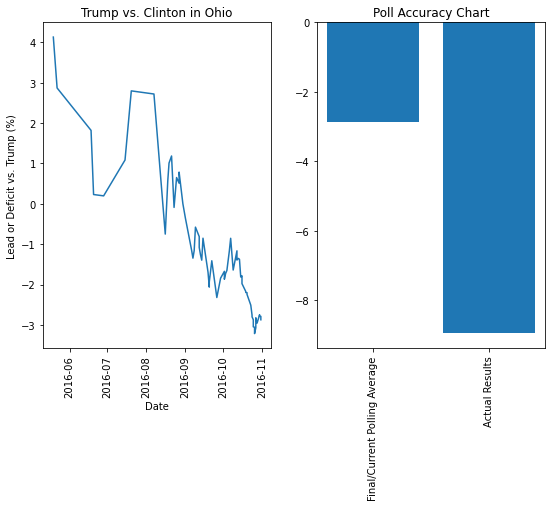

'Percentage Points of Trump Underestimation in Ohio From Polls of Likely Voters: 6.07%'

In [30]:
trump_vs_clinton(trump_clinton, "Ohio", results_2016, likely_voters = True)

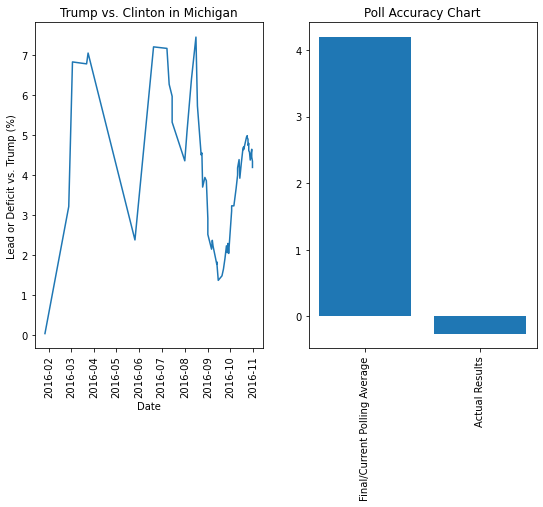

'Percentage Points of Trump Underestimation in Michigan From All Polls: 4.45%'

In [31]:
trump_vs_clinton(trump_clinton, "Michigan", results_2016)

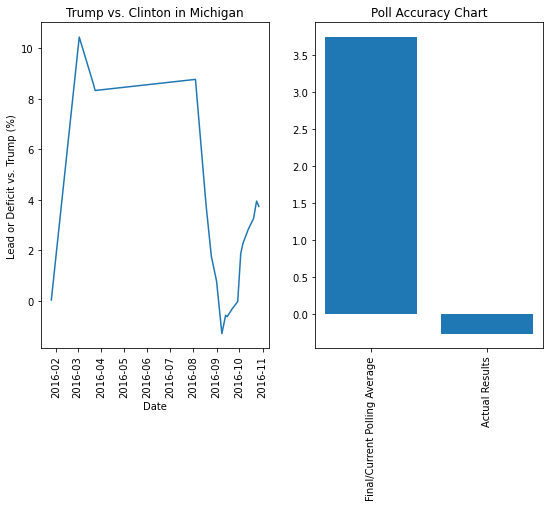

'Percentage Points of Trump Underestimation in Michigan From Historically Reliable Polls: 4.0%'

In [32]:
trump_vs_clinton(trump_clinton, "Michigan", results_2016, reliable = True)

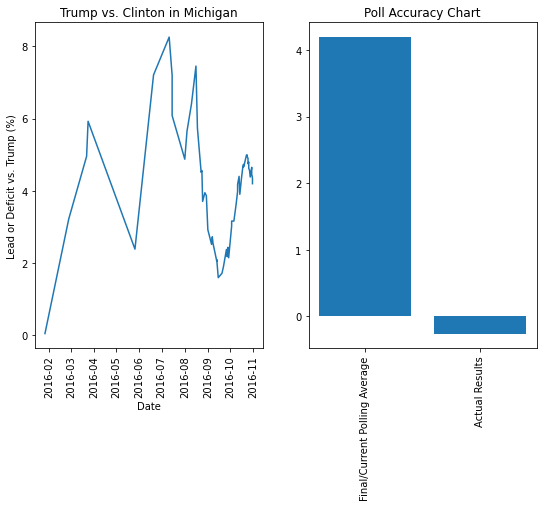

'Percentage Points of Trump Underestimation in Michigan From Polls of Likely Voters: 4.45%'

In [33]:
trump_vs_clinton(trump_clinton, "Michigan", results_2016, likely_voters = True)

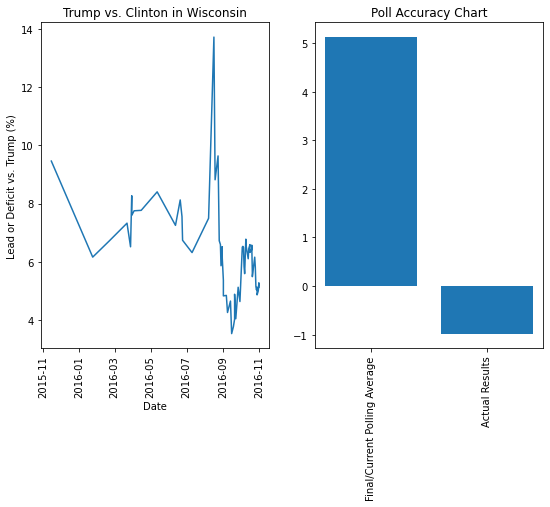

'Percentage Points of Trump Underestimation in Wisconsin From All Polls: 6.1%'

In [34]:
trump_vs_clinton(trump_clinton, "Wisconsin", results_2016)

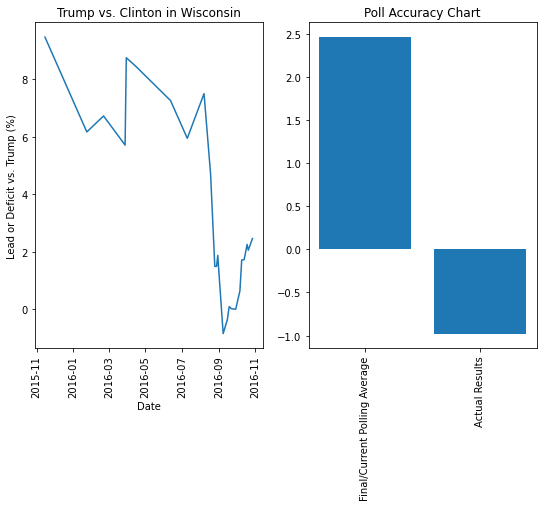

'Percentage Points of Trump Underestimation in Wisconsin From Historically Reliable Polls: 3.44%'

In [35]:
trump_vs_clinton(trump_clinton, "Wisconsin", results_2016, reliable = True)

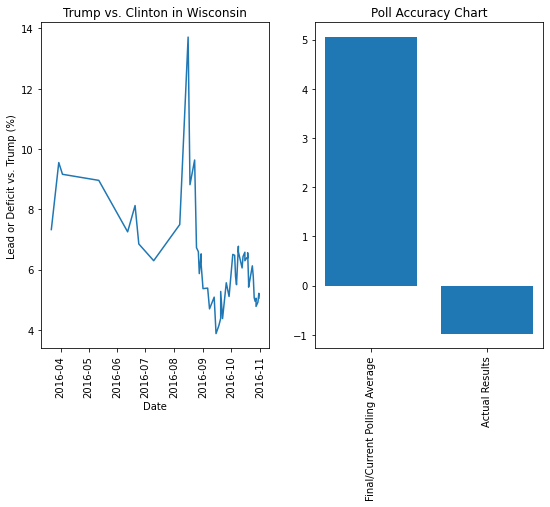

'Percentage Points of Trump Underestimation in Wisconsin From Polls of Likely Voters: 6.03%'

In [36]:
trump_vs_clinton(trump_clinton, "Wisconsin", results_2016, likely_voters = True)

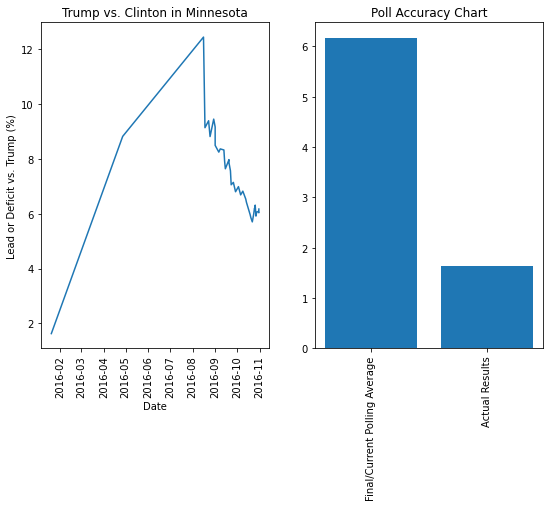

'Percentage Points of Trump Underestimation in Minnesota From All Polls: 4.54%'

In [37]:
trump_vs_clinton(trump_clinton, "Minnesota", results_2016)

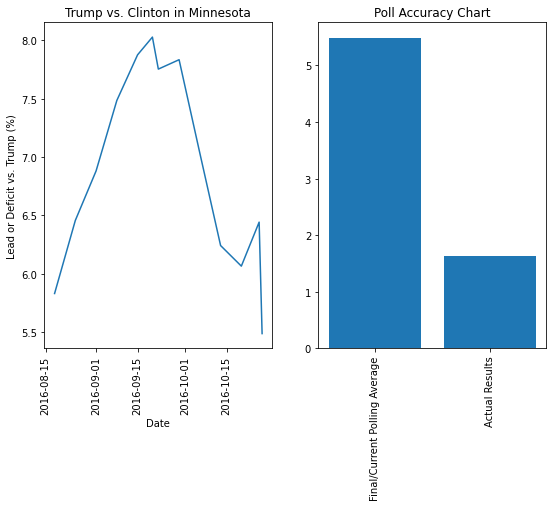

'Percentage Points of Trump Underestimation in Minnesota From Historically Reliable Polls: 3.86%'

In [38]:
trump_vs_clinton(trump_clinton, "Minnesota", results_2016, reliable = True)

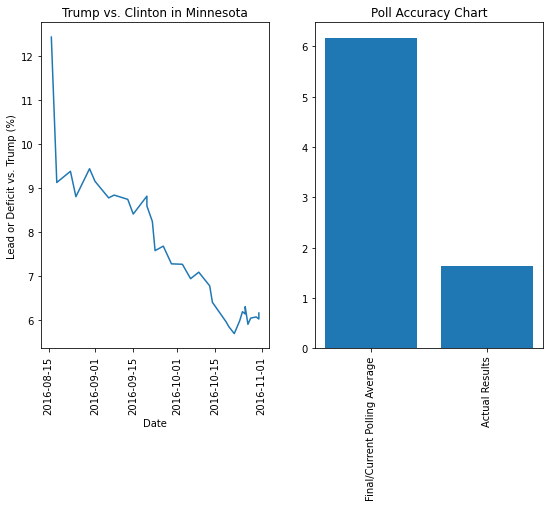

'Percentage Points of Trump Underestimation in Minnesota From Polls of Likely Voters: 4.54%'

In [39]:
trump_vs_clinton(trump_clinton, "Minnesota", results_2016, likely_voters = True)

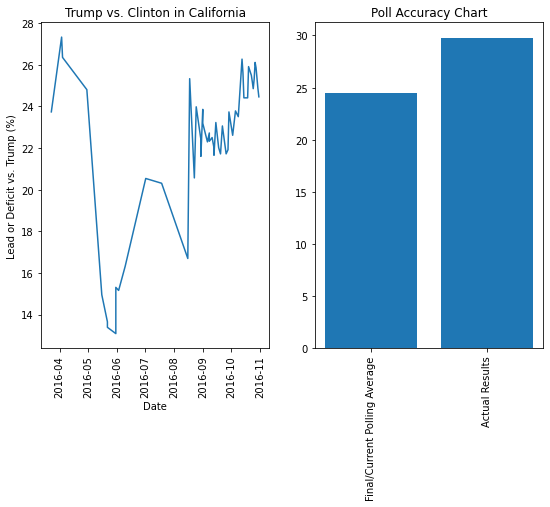

'Percentage Points of Trump Underestimation in California From All Polls: -5.31%'

In [40]:
trump_vs_clinton(trump_clinton, "California", results_2016)

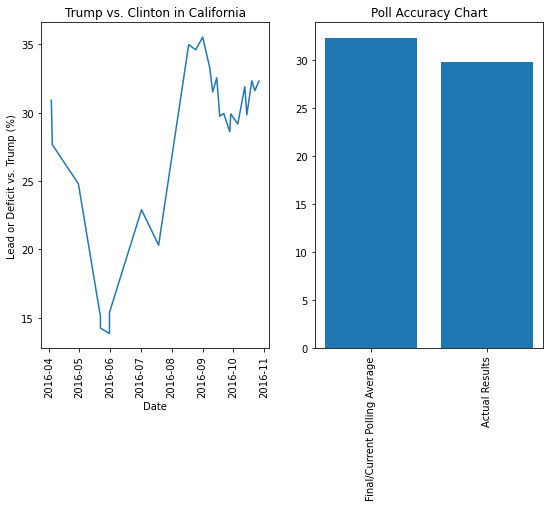

'Percentage Points of Trump Underestimation in California From Historically Reliable Polls: 2.54%'

In [41]:
trump_vs_clinton(trump_clinton, "California", results_2016, reliable = True)

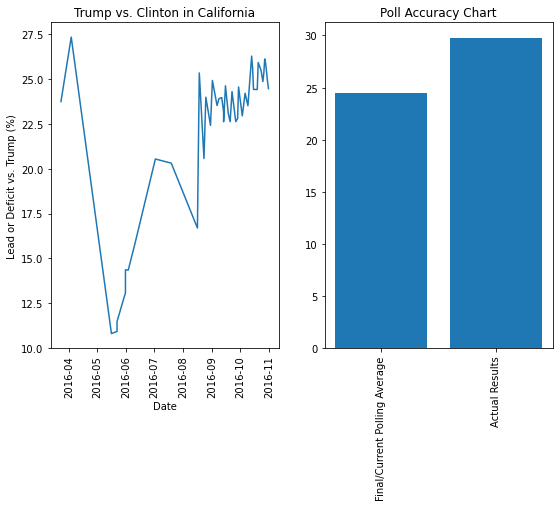

'Percentage Points of Trump Underestimation in California From Polls of Likely Voters: -5.31%'

In [42]:
trump_vs_clinton(trump_clinton, "California", results_2016, likely_voters = True)

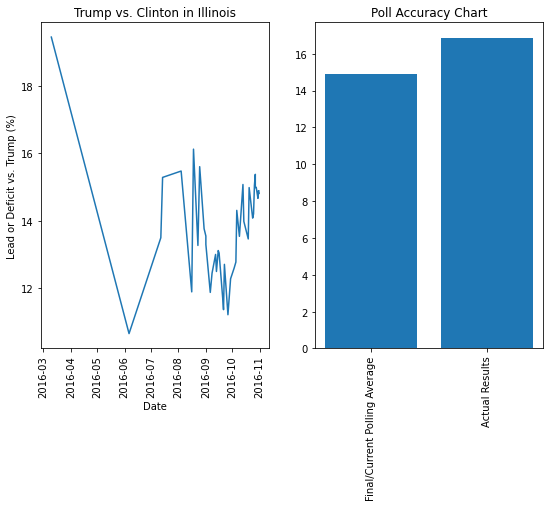

'Percentage Points of Trump Underestimation in Illinois From All Polls: -1.98%'

In [43]:
trump_vs_clinton(trump_clinton, "Illinois", results_2016)

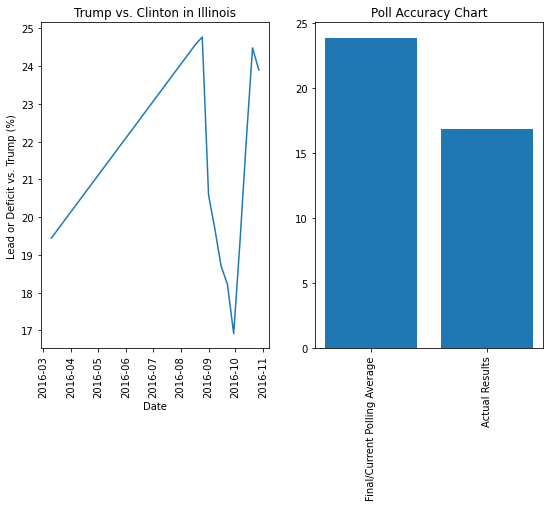

'Percentage Points of Trump Underestimation in Illinois From Historically Reliable Polls: 7.03%'

In [44]:
trump_vs_clinton(trump_clinton, "Illinois", results_2016, reliable = True)

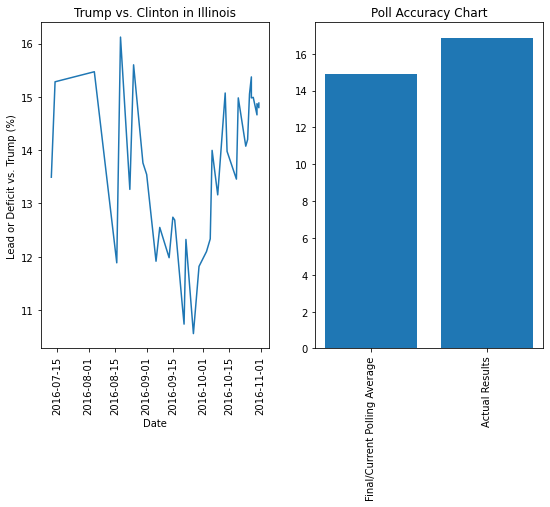

'Percentage Points of Trump Underestimation in Illinois From Polls of Likely Voters: -1.98%'

In [45]:
trump_vs_clinton(trump_clinton, "Illinois", results_2016, likely_voters = True)

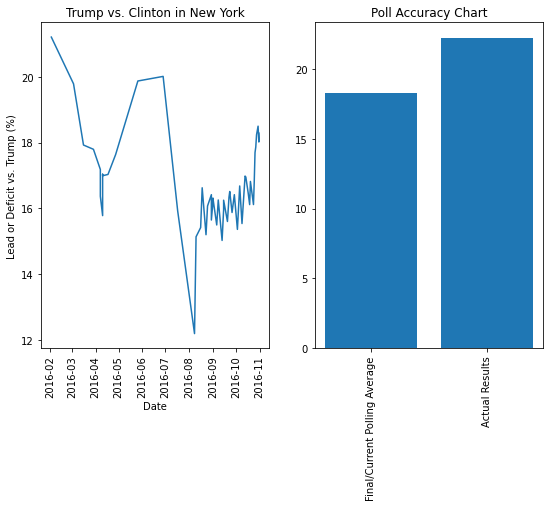

'Percentage Points of Trump Underestimation in New York From All Polls: -3.92%'

In [46]:
trump_vs_clinton(trump_clinton, "New York", results_2016)

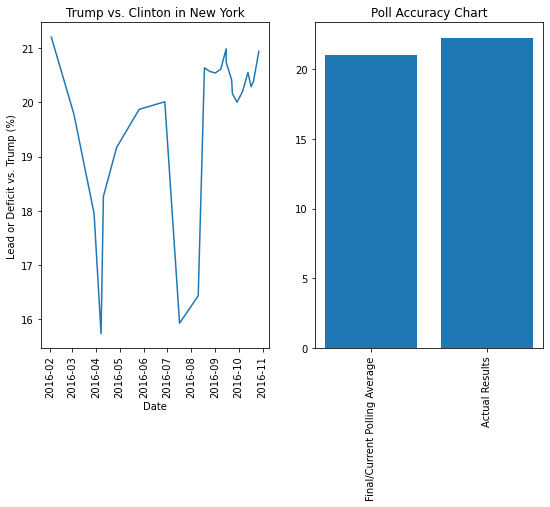

'Percentage Points of Trump Underestimation in New York From Historically Reliable Polls: -1.26%'

In [47]:
trump_vs_clinton(trump_clinton, "New York", results_2016, reliable = True)

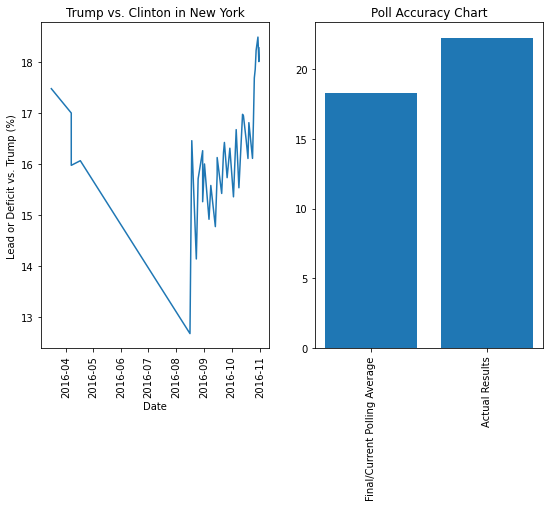

'Percentage Points of Trump Underestimation in New York From Polls of Likely Voters: -3.92%'

In [48]:
trump_vs_clinton(trump_clinton, "New York", results_2016, likely_voters = True)

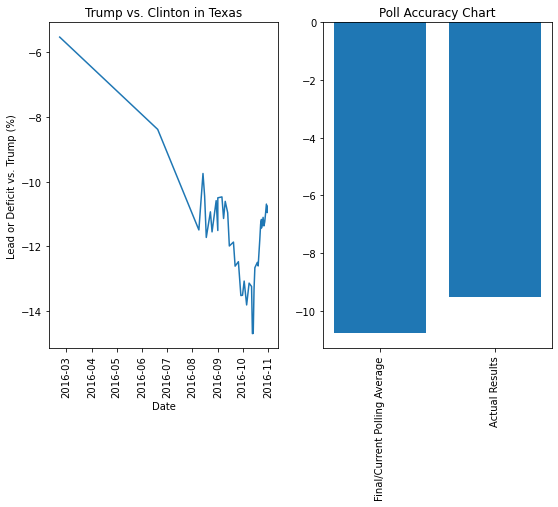

'Percentage Points of Trump Underestimation in Texas From All Polls: -1.24%'

In [49]:
trump_vs_clinton(trump_clinton, "Texas", results_2016)

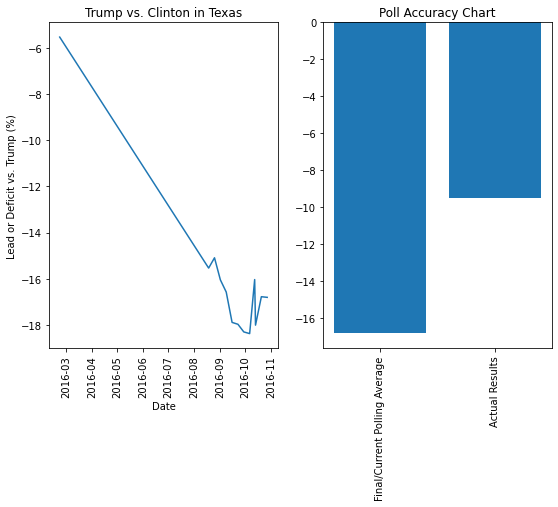

'Percentage Points of Trump Underestimation in Texas From Historically Reliable Polls: -7.29%'

In [50]:
trump_vs_clinton(trump_clinton, "Texas", results_2016, reliable = True)

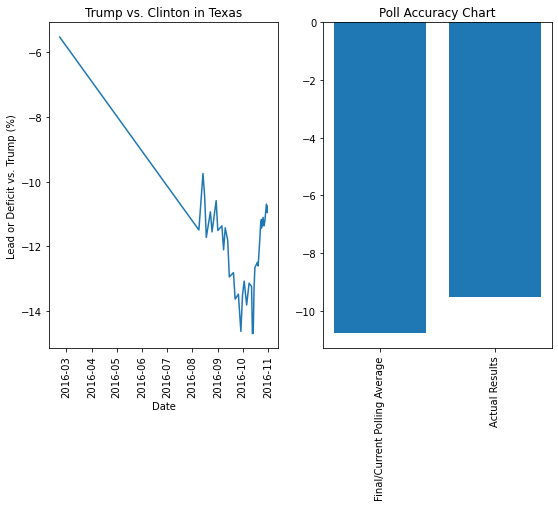

'Percentage Points of Trump Underestimation in Texas From Polls of Likely Voters: -1.24%'

In [51]:
trump_vs_clinton(trump_clinton, "Texas", results_2016, likely_voters = True)

In [52]:
def get_best_pollsters(trump_clinton, state, results_2016):
    
    #Getting polls only from the final two weeks in a given state
    
    final_polls = trump_clinton[(trump_clinton["end_date"] >= "2016-10-17") & (trump_clinton["state"] == state)]
    
    #Getting a variable to represent the true results in each state
    
    final_polls = pd.merge(final_polls, results_2016, on = "state", how = "inner")
    
    #Getting the average results in the state for each pollster and the difference from actual results
    
    by_pollster = final_polls.groupby(["pollster", "dem_lead_y"]).mean().reset_index()[["pollster", "dem_lead_x", "dem_lead_y"]]
    by_pollster["trump_underestimation"] = by_pollster["dem_lead_x"] - by_pollster["dem_lead_y"]
    graph_pollsters = by_pollster.sort_values("trump_underestimation", ascending = False)
    
    #Getting the number of polls from each pollster
    
    num_polls = final_polls.groupby("pollster").size().reset_index()
    
    #Finally, plotting our results
    
    plt.subplots(figsize = (10,10))
    sns.barplot(x = graph_pollsters["trump_underestimation"], y = graph_pollsters["pollster"])
    plt.xlabel("Percentage Point Difference From Actual Result (more positive number = more Trump underestimation)")
    plt.ylabel(None)
    plt.show()
    
    #Table of most to least accurate pollsters in terms of magnitude of inaccuracy
    
    best_pollsters = by_pollster
    best_pollsters["trump_underestimation"] = abs(by_pollster["dem_lead_x"] - by_pollster["dem_lead_y"])
    best_pollsters = pd.merge(best_pollsters, num_polls, on = "pollster") 
    best_pollsters["Number of Polls"] = best_pollsters[0]
    best_pollsters["Pct Pts Inaccuracy"] = best_pollsters["trump_underestimation"]
    best_pollsters["Pollster"] = best_pollsters["pollster"]
    best_pollsters = best_pollsters.sort_values("trump_underestimation")[["Pollster", "Pct Pts Inaccuracy", "Number of Polls"]]
    
    #Linear Regression of polls released the final two weeks vs final inaccuracy
    
    sns.lmplot(data = best_pollsters, x = "Number of Polls", y = "Pct Pts Inaccuracy")
    plt.title(f"Number of Polls Released vs. Inaccuracy in {state}")
    print(stats.linregress(best_pollsters["Number of Polls"], best_pollsters["Pct Pts Inaccuracy"]))

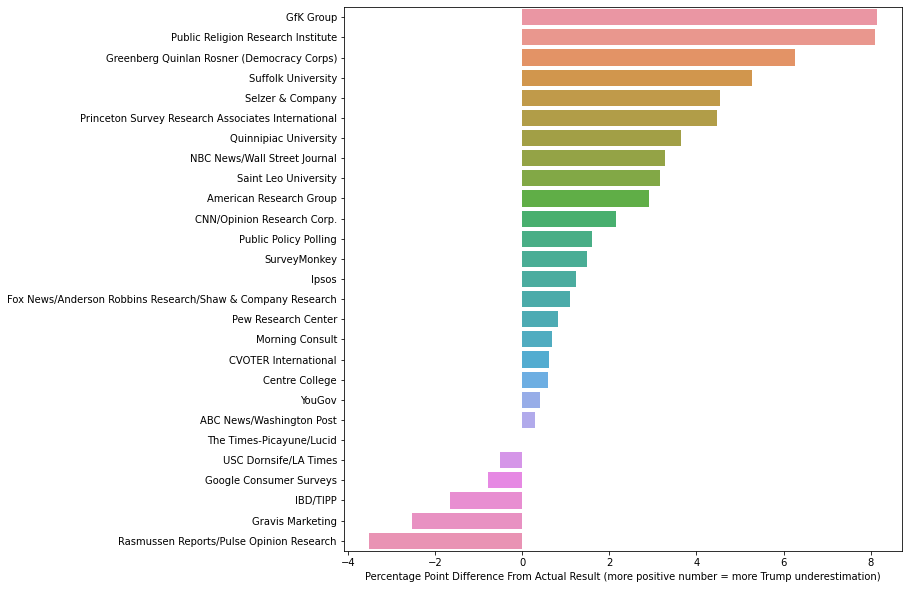

LinregressResult(slope=-0.06573106522415247, intercept=3.439767617022699, rvalue=-0.4427447646920583, pvalue=0.020738758210948508, stderr=0.026623740019566387)


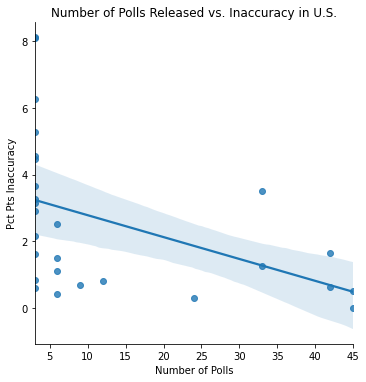

In [53]:
get_best_pollsters(trump_clinton, "U.S.", results_2016)

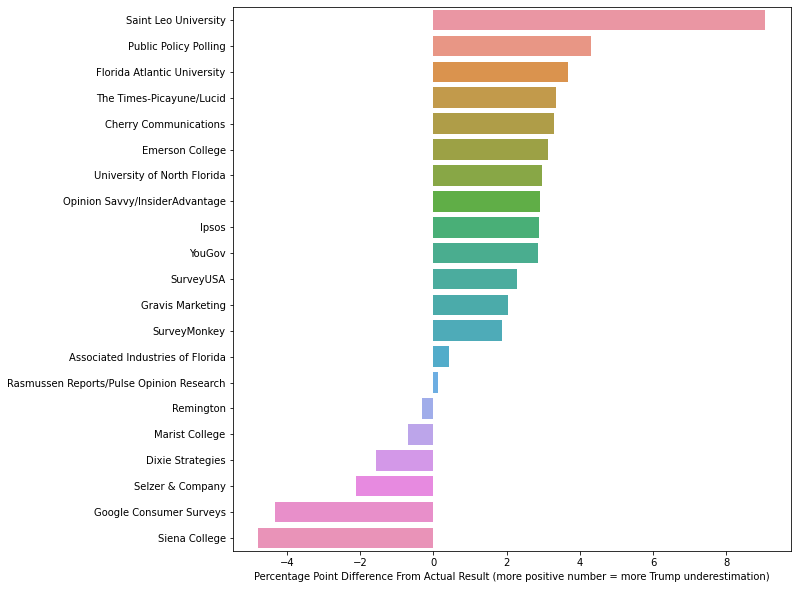

LinregressResult(slope=-0.13147978698989995, intercept=3.469762870475614, rvalue=-0.3146283867304236, pvalue=0.16480262845076044, stderr=0.09100156207579228)


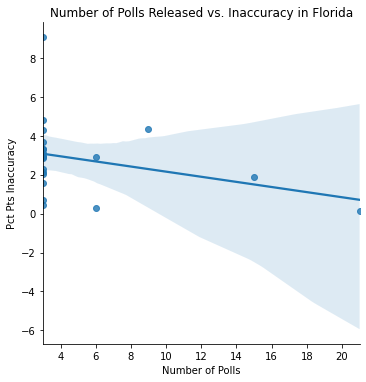

In [54]:
get_best_pollsters(trump_clinton, "Florida", results_2016)

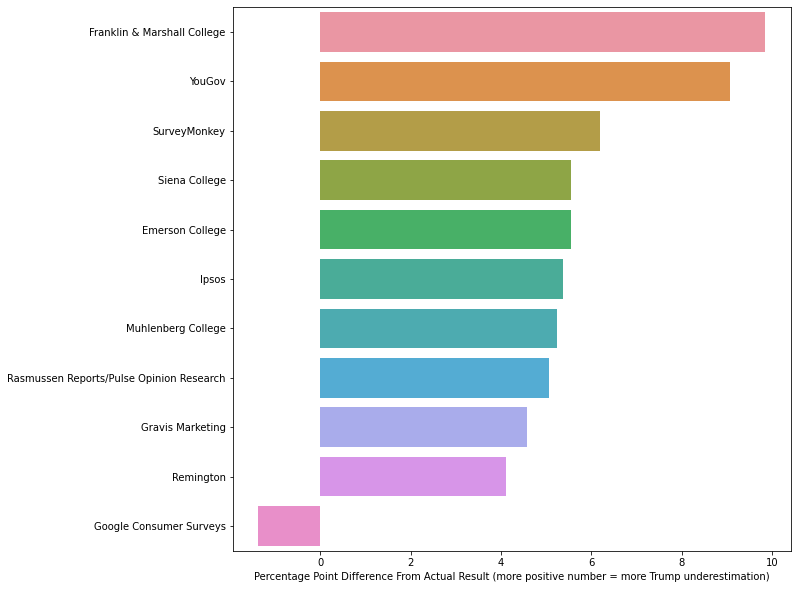

LinregressResult(slope=-0.099129985051439, intercept=6.32755812516366, rvalue=-0.2561272889451045, pvalue=0.4471278447280237, stderr=0.12470793046078664)


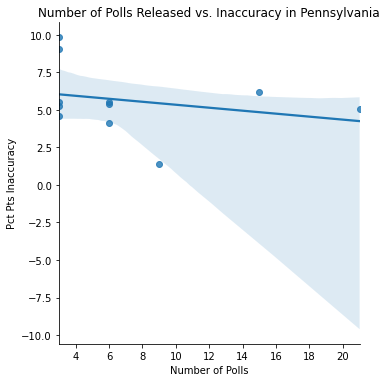

In [55]:
get_best_pollsters(trump_clinton, "Pennsylvania", results_2016)

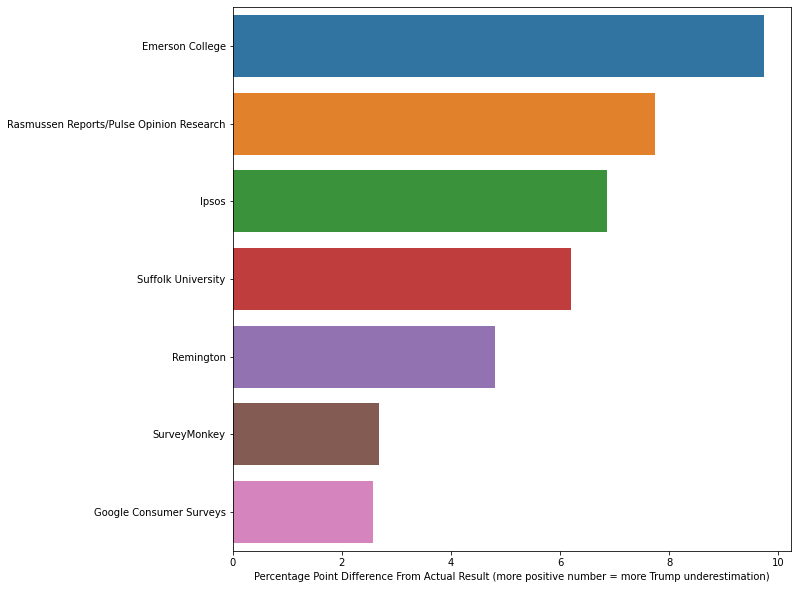

LinregressResult(slope=-0.08017725291005297, intercept=6.523640526235356, rvalue=-0.20400494703097885, pvalue=0.6608320049705139, stderr=0.17206589226208563)


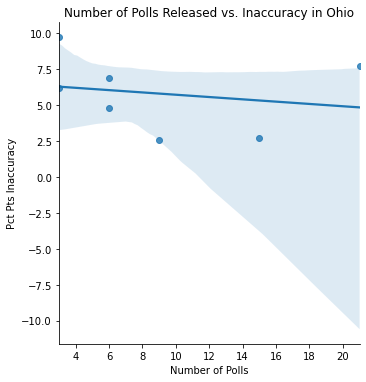

In [56]:
get_best_pollsters(trump_clinton, "Ohio", results_2016)

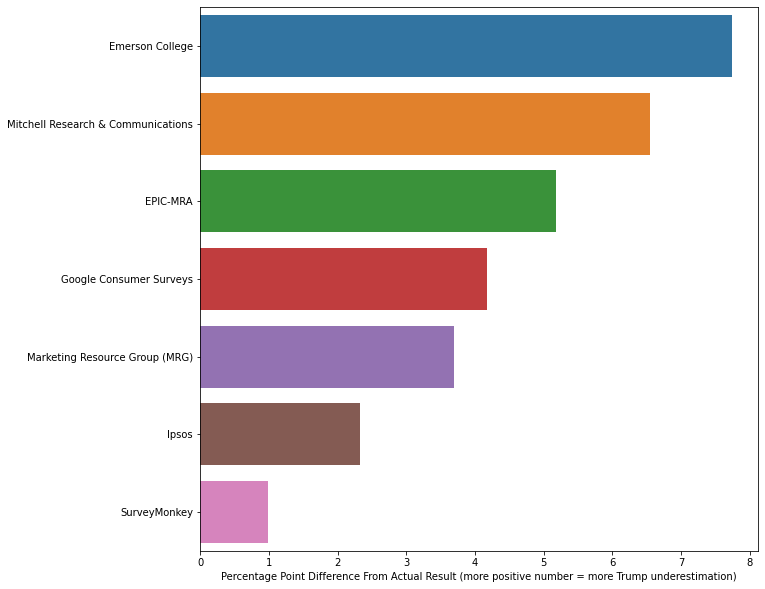

LinregressResult(slope=-0.20194192626262614, intercept=5.849446780818, rvalue=-0.4194809137866781, pvalue=0.34883172949273195, stderr=0.19543498832070583)


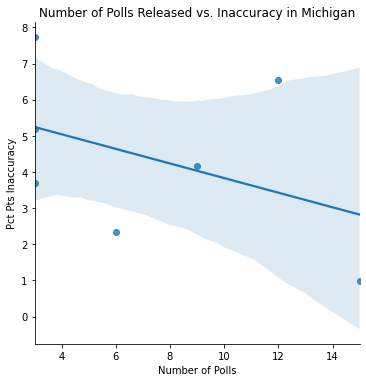

In [57]:
get_best_pollsters(trump_clinton, "Michigan", results_2016)

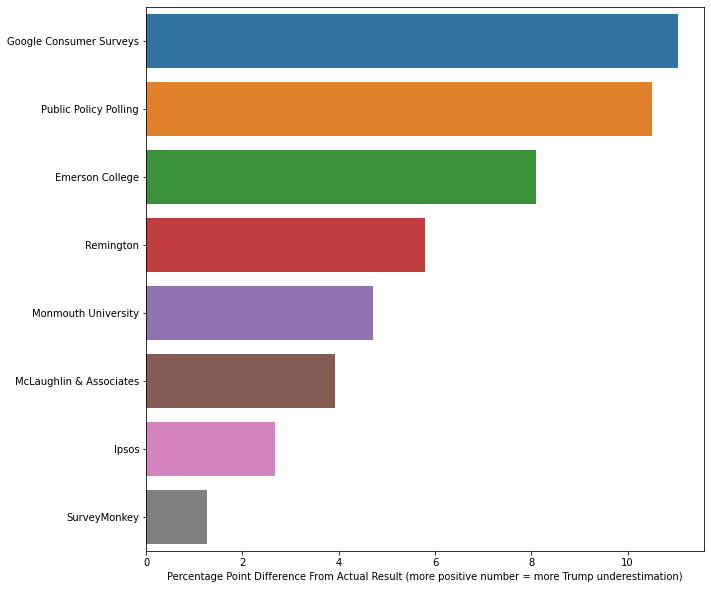

LinregressResult(slope=-0.2955132222222221, intercept=7.773837035240288, rvalue=-0.35037889678811374, pvalue=0.39482730839639807, stderr=0.3224936999037691)


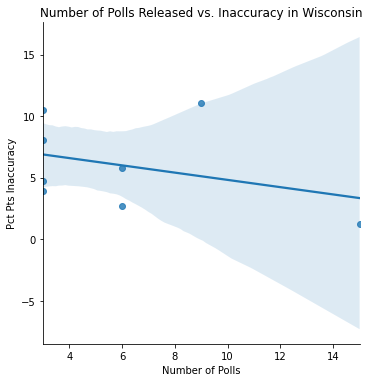

In [58]:
get_best_pollsters(trump_clinton, "Wisconsin", results_2016)

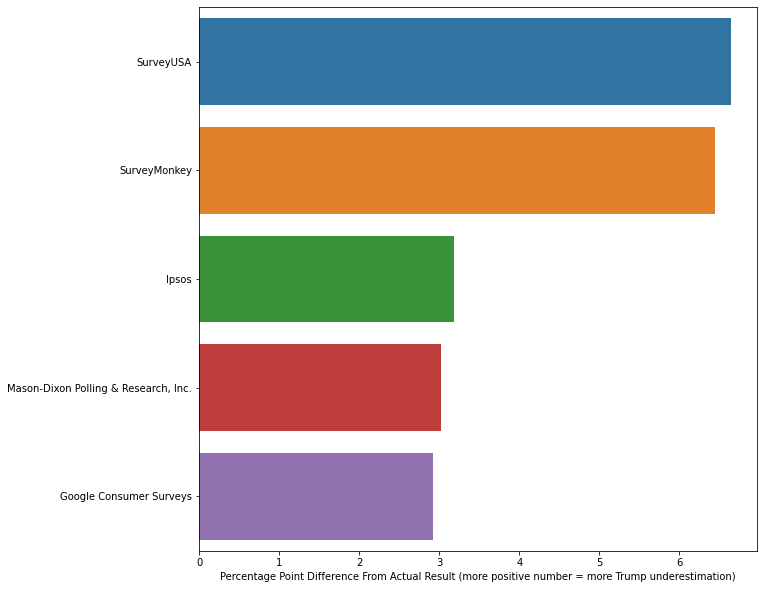

LinregressResult(slope=0.11080276587301588, intercept=3.6443364768603694, rvalue=0.28955936462226245, pvalue=0.6365403351291186, stderr=0.2114642351523154)


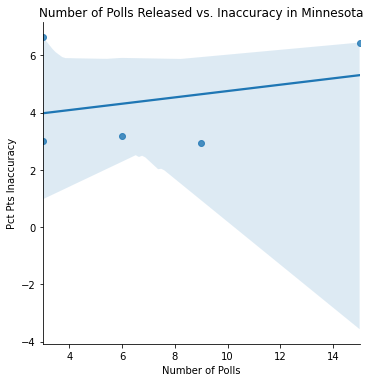

In [59]:
get_best_pollsters(trump_clinton, "Minnesota", results_2016)